In [1]:
#Sagar Bhavsar
# hackathon iD- DS_EICT0062

In [2]:
#weather forecasting program


<h1>IMPORTING NECESSARY PYTHON LIBRARIES</h1>

In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import os
import pandas as pd
from io import StringIO
import io
import string
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime


In [4]:
#reading the csv file into this jupiter notebook

df=pd.read_csv(r"C:\Users\Sagar Bhavsar\Downloads\evaluate.csv")

In [5]:
df


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
0,2015-03-01 00:00:00.000 +0100,Partly Cloudy,rain,15.49444,15.49444,0.78,6.4239,182,16.1000,0,1013.50
1,2015-03-01 01:00:00.000 +0100,Partly Cloudy,rain,15.37778,15.37778,0.81,3.4293,201,16.1000,0,1013.70
2,2015-03-01 02:00:00.000 +0100,Partly Cloudy,rain,15.78333,15.78333,0.80,5.5867,174,15.1823,0,1013.73
3,2015-03-01 03:00:00.000 +0100,Partly Cloudy,rain,14.70556,14.70556,0.84,6.5044,219,16.1000,0,1013.90
4,2015-03-01 04:00:00.000 +0100,Partly Cloudy,rain,14.68333,14.68333,0.83,3.2200,190,16.1000,0,1013.72
...,...,...,...,...,...,...,...,...,...,...,...
714,2015-03-08 19:00:00.000 +0100,Mostly Cloudy,rain,25.02222,25.02222,0.41,4.7817,179,16.1000,0,1010.41
715,2015-03-08 20:00:00.000 +0100,Mostly Cloudy,rain,23.86111,23.86111,0.45,3.4454,180,16.1000,0,1010.80
716,2015-03-08 21:00:00.000 +0100,Mostly Cloudy,rain,21.42778,21.42778,0.53,3.9123,48,15.5526,0,1011.11
717,2015-03-08 22:00:00.000 +0100,Mostly Cloudy,rain,18.83889,18.83889,0.73,0.0000,0,16.1000,0,1011.42


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            719 non-null    object 
 1   Summary                   719 non-null    object 
 2   Precip Type               719 non-null    object 
 3   Temperature (C)           719 non-null    float64
 4   Apparent Temperature (C)  719 non-null    float64
 5   Humidity                  719 non-null    float64
 6   Wind Speed (km/h)         719 non-null    float64
 7   Wind Bearing (degrees)    719 non-null    int64  
 8   Visibility (km)           719 non-null    float64
 9   Cloud Cover               719 non-null    int64  
 10  Pressure (millibars)      719 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 61.9+ KB


<h1>EDA and pre-processing</h1>

In [7]:
df["Daily summary"] = pd.NaT
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily summary
0,2015-03-01 00:00:00.000 +0100,Partly Cloudy,rain,15.49444,15.49444,0.78,6.4239,182,16.1000,0,1013.50,NaT
1,2015-03-01 01:00:00.000 +0100,Partly Cloudy,rain,15.37778,15.37778,0.81,3.4293,201,16.1000,0,1013.70,NaT
2,2015-03-01 02:00:00.000 +0100,Partly Cloudy,rain,15.78333,15.78333,0.80,5.5867,174,15.1823,0,1013.73,NaT
3,2015-03-01 03:00:00.000 +0100,Partly Cloudy,rain,14.70556,14.70556,0.84,6.5044,219,16.1000,0,1013.90,NaT
4,2015-03-01 04:00:00.000 +0100,Partly Cloudy,rain,14.68333,14.68333,0.83,3.2200,190,16.1000,0,1013.72,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
714,2015-03-08 19:00:00.000 +0100,Mostly Cloudy,rain,25.02222,25.02222,0.41,4.7817,179,16.1000,0,1010.41,NaT
715,2015-03-08 20:00:00.000 +0100,Mostly Cloudy,rain,23.86111,23.86111,0.45,3.4454,180,16.1000,0,1010.80,NaT
716,2015-03-08 21:00:00.000 +0100,Mostly Cloudy,rain,21.42778,21.42778,0.53,3.9123,48,15.5526,0,1011.11,NaT
717,2015-03-08 22:00:00.000 +0100,Mostly Cloudy,rain,18.83889,18.83889,0.73,0.0000,0,16.1000,0,1011.42,NaT


In [8]:
#daily summary will be target variable

<h1>Exploratory Data Analysis (Includes Graphs and other necessary operations)</h1>

In [9]:
#visualizing the data:


# columns to be visualised: 
#Temperature (C),
#Humidity
#,Wind Speed (km/h)	
#Wind Bearing (degrees)	
#Visibility (km)
#Pressure (millibars)

Text(0, 0.5, 'temp in C')

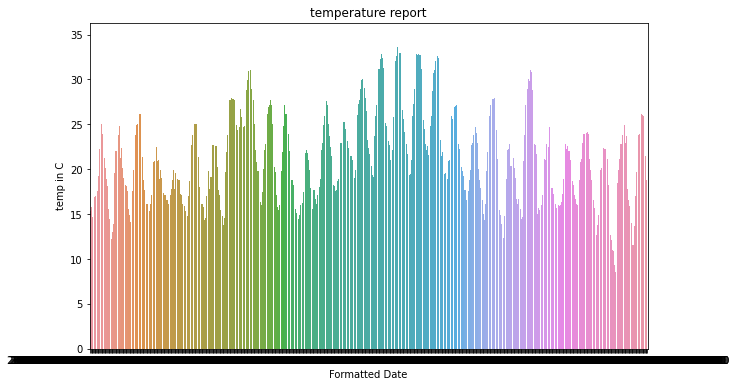

In [10]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("temperature report")

# Bar chart showing temperature report
sns.barplot(x=df['Formatted Date'], y=df['Temperature (C)'])

# Add label for vertical axis
plt.ylabel("temp in C")

Text(0, 0.5, 'Humidity')

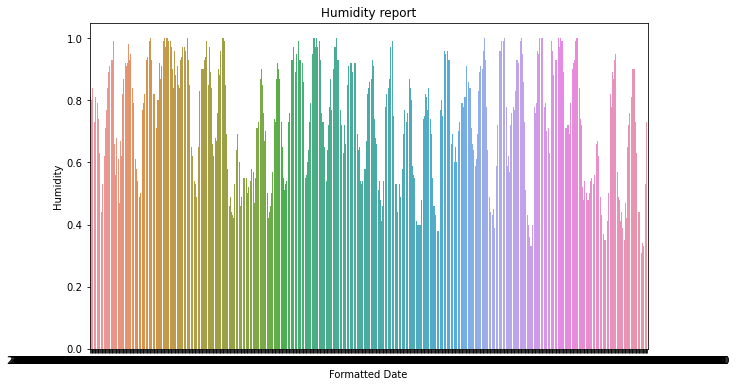

In [11]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Humidity report")

# Bar chart showing Humidity report
sns.barplot(x=df['Formatted Date'], y=df['Humidity'])

# Add label for vertical axis
plt.ylabel("Humidity")

Text(0, 0.5, 'Wind Speed (km/h)')

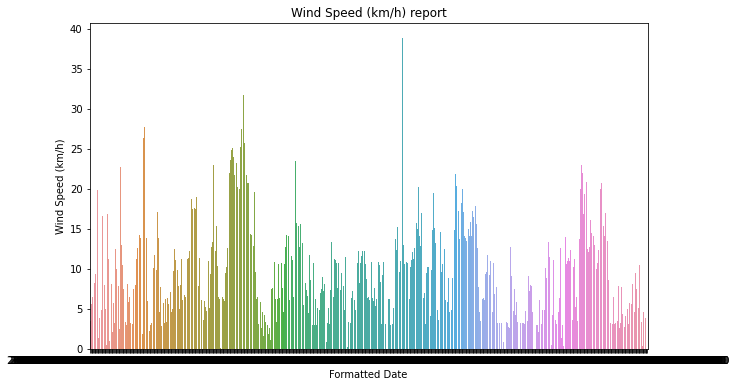

In [12]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Wind Speed (km/h) report")

# Bar chart showing Wind Speed (km/h) report
sns.barplot(x=df['Formatted Date'], y=df['Wind Speed (km/h)'])

# Add label for vertical axis
plt.ylabel("Wind Speed (km/h)")

Text(0, 0.5, 'Wind Bearing (degrees)')

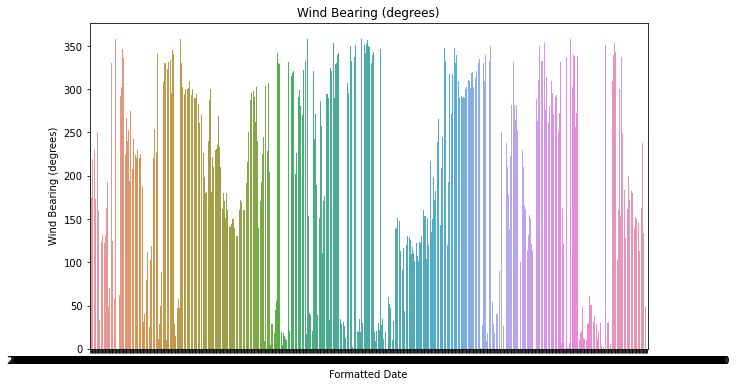

In [13]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Wind Bearing (degrees)")

# Bar chart showing Wind Bearing (degrees) report
sns.barplot(x=df['Formatted Date'], y=df['Wind Bearing (degrees)'])

# Add label for vertical axis
plt.ylabel("Wind Bearing (degrees)")

Text(0, 0.5, 'Visibility (km)')

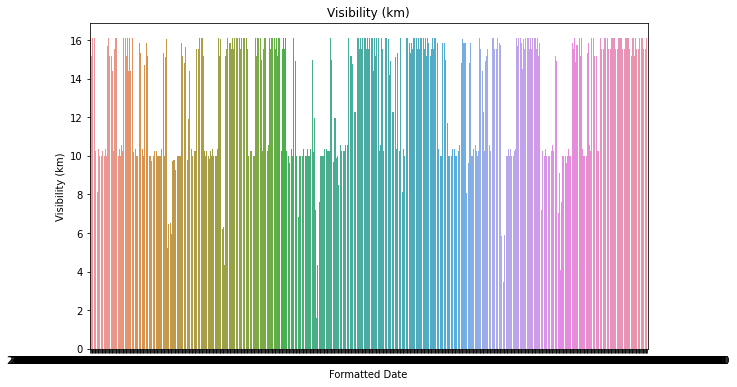

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Visibility (km)")

# Bar chart showing Visibility (km) report
sns.barplot(x=df['Formatted Date'], y=df['Visibility (km)'])

# Add label for vertical axis
plt.ylabel("Visibility (km)")

Text(0, 0.5, 'Pressure (millibars)')

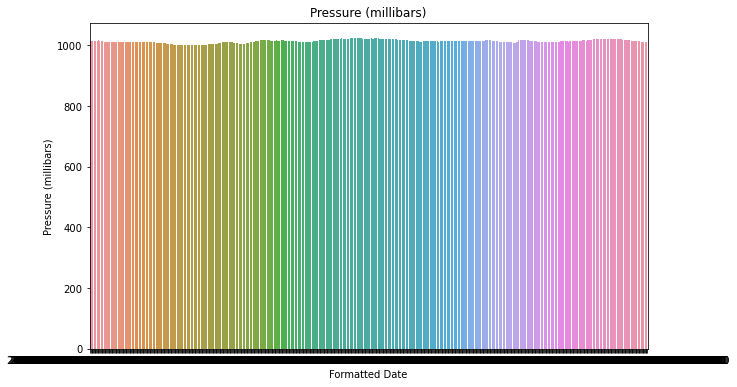

In [15]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Pressure (millibars)")

# Bar chart showing Pressure (millibars) report
sns.barplot(x=df['Formatted Date'], y=df['Pressure (millibars)'])

# Add label for vertical axis
plt.ylabel("Pressure (millibars)")

In [16]:
#visualization is done

<h1>Data Augmentation and feature engineering</h1>

In [17]:


df['Daily summary'] = [f'the Temperature is {a} and it feels like {b},humidity is {c},wind speed in (km/h) is {d},Visibility in km is{e} and pressure in mb is{f}' for a, b,c,d,e,f in zip(df["Temperature (C)"],df["Apparent Temperature (C)"],df["Humidity"],df["Wind Speed (km/h)"],df["Visibility (km)"],df["Pressure (millibars)"])]


dfs=df['Daily summary']
dfs




0      the Temperature is 15.494439999999999 and it f...
1      the Temperature is 15.37778 and it feels like ...
2      the Temperature is 15.78333 and it feels like ...
3      the Temperature is 14.70556 and it feels like ...
4      the Temperature is 14.683329999999998 and it f...
                             ...                        
714    the Temperature is 25.02222 and it feels like ...
715    the Temperature is 23.86111 and it feels like ...
716    the Temperature is 21.42778 and it feels like ...
717    the Temperature is 18.83889 and it feels like ...
718    the Temperature is 17.2 and it feels like 17.2...
Name: Daily summary, Length: 719, dtype: object

In [18]:
#daily summary column is now added that gives the summary for the weather report of the date .